In [1]:
%pip install reservoirpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from reservoirpy.nodes import Reservoir, Ridge, Input
from reservoirpy.utils import verbosity


rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [14, 10]

In [27]:
from reservoirpy.datasets import lorenz

len_data=1000
data=lorenz(len_data,h=0.01,x0=[2,2,2])
data=data[:1,:]-data[:,:]
len_data=len(data)

In [28]:
data.shape

(1000, 3)

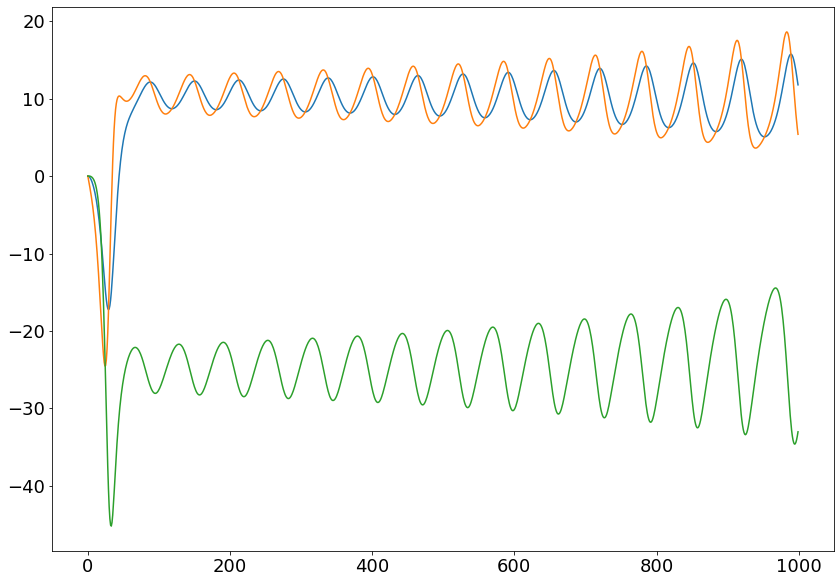

In [29]:
plt.plot(data)
plt.show()

In [60]:
reservoir = Reservoir(units=300, lr=0.3, sr=1.2)
readout = Ridge(output_dim=3, ridge=1e-5)

In [61]:
esn = reservoir >> readout

In [62]:
#parameters
train_len=int(len_data/2)
test_len=int(len_data)
warmup=100

In [63]:
data[:train_len,:].shape

(500, 3)

In [64]:
data[1:(train_len+1),:].shape

(500, 3)

In [65]:
verbosity(1)
esn.fit(data[:train_len,:], data[1:(train_len+1),:], warmup=warmup)

Running Model-3:   0%|                                                                                                                                                                       | 0/1 [00:00<?, ?it/s]
Running Model-3: 500it [00:00, 6466.01it/s]                                                                                                                                                                        
Running Model-3: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.24it/s]

Fitting node Ridge-3...


'Model-3': Model('Reservoir-3', 'Ridge-3')

In [66]:
predictions_lorenz = esn.run(data[:test_len,:])

Running Model-3: 1000it [00:00, 6928.52it/s]                                                                                                                                                                       


In [67]:
def plot_train(train_len=train_len, test_len=test_len, warmup=warmup,len_data=len_data,show_warmup=True):
    if show_warmup:
        plt.plot(data[:train_len,0],label='true') #np.linspace(100,500,400),
    
        plt.plot(np.linspace(warmup,train_len,train_len-warmup),predictions_lorenz[warmup:train_len,0],label='RC model')
    
        plt.plot(predictions_lorenz[:warmup,0],label='warmup model',color='red',linestyle='--')
    else:
        plt.plot(data[warmup:train_len,0],label='true') #np.linspace(100,500,400),
    
        plt.plot(predictions_lorenz[warmup:train_len,0],label='RC model')
    
    
    plt.legend()
    
    plt.title("training set prediction")
    plt.xlabel("t")
    plt.ylabel("x(t)")
    plt.grid()
    plt.show()

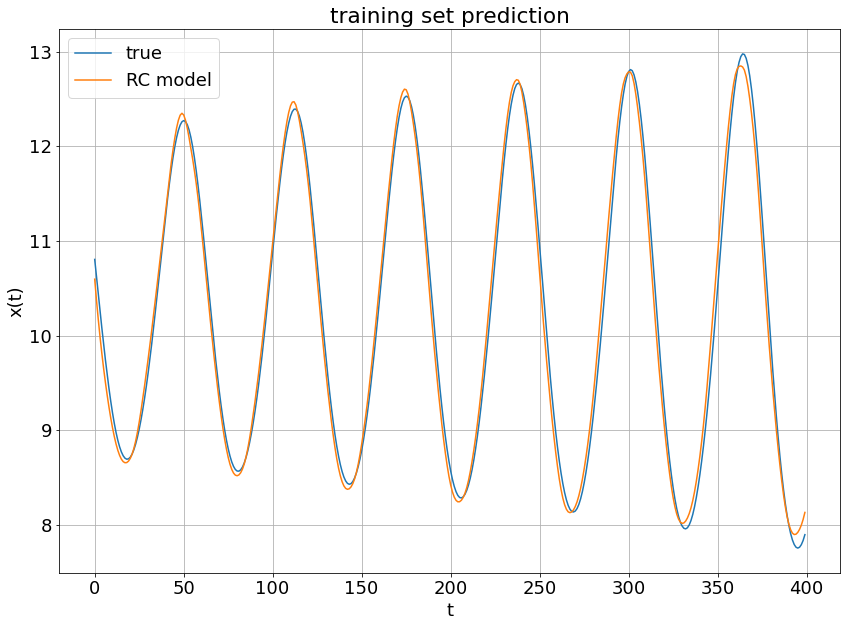

In [68]:
plot_train(show_warmup=False)

In [69]:
def plot_test(train_len=train_len, test_len=test_len, warmup=warmup,len_data=len_data,coordinate=0):

    plt.plot(data[train_len:,coordinate],label='true') #np.linspace(100,500,400),
    
    plt.plot(predictions_lorenz[train_len:,coordinate],label='RC model')
        
    plt.legend()
    
    plt.title("Test set prediction 1-step")
    plt.xlabel("t")
    if coordinate==0:
            plt.ylabel("x(t)")
    if coordinate==1:
            plt.ylabel("y(t)")
    else:
            plt.ylabel("z(t)")
    
    plt.grid()
    plt.show()

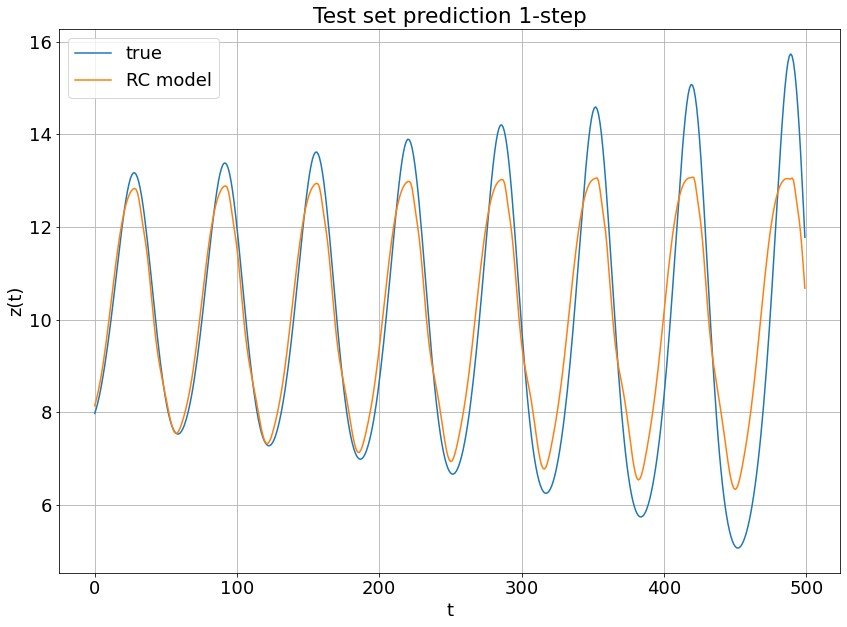

In [40]:
plot_test(coordinate=0)

In [70]:
verbosity(level=0)

len_traj=train_len
correct_pred_lorenz=[]

for i in range(len_traj):
    if i==0:
        point=np.array([(data[0,:])]) #removed esn.run
        correct_pred_lorenz.append(point)
    correct_pred_lorenz.append(esn.run(correct_pred_lorenz[-1])+np.random.normal(0, 0, size=(1, 3)))
    

In [71]:
print(np.asarray(correct_pred_lorenz)[0,0,0]) 

0.0


In [72]:
print(data[0,0])

0.0


In [73]:
def plot_test_correct(data=data,correct_pred_lorenz=correct_pred_lorenz,train_len=train_len, test_len=test_len, warmup=warmup,len_data=len_data,coordinate=0):

    plt.plot(data[train_len:,coordinate],label='true data')
    plt.plot(np.asarray(correct_pred_lorenz)[:,0,coordinate],label='model ')
    plt.legend()    
    plt.title("test set real prediction ")
    plt.xlabel("t")
    if coordinate==0:
            plt.ylabel("x(t)")
    if coordinate==1:
            plt.ylabel("y(t)")
    else:
            plt.ylabel("z(t)")
    plt.grid()
    plt.show()


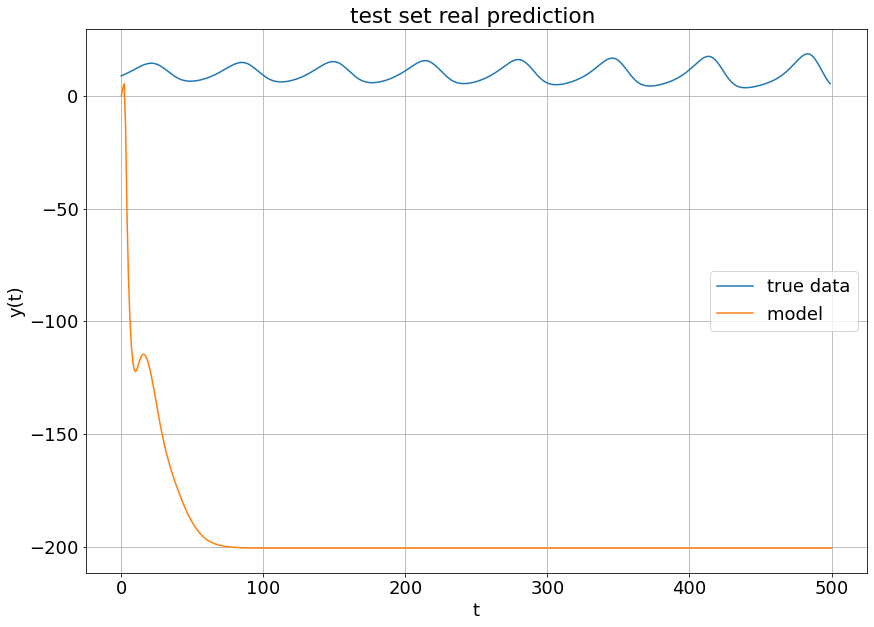

In [75]:
plot_test_correct(coordinate=1)

In [46]:
traj3D=np.asarray(correct_pred_lorenz)[:,0,:]


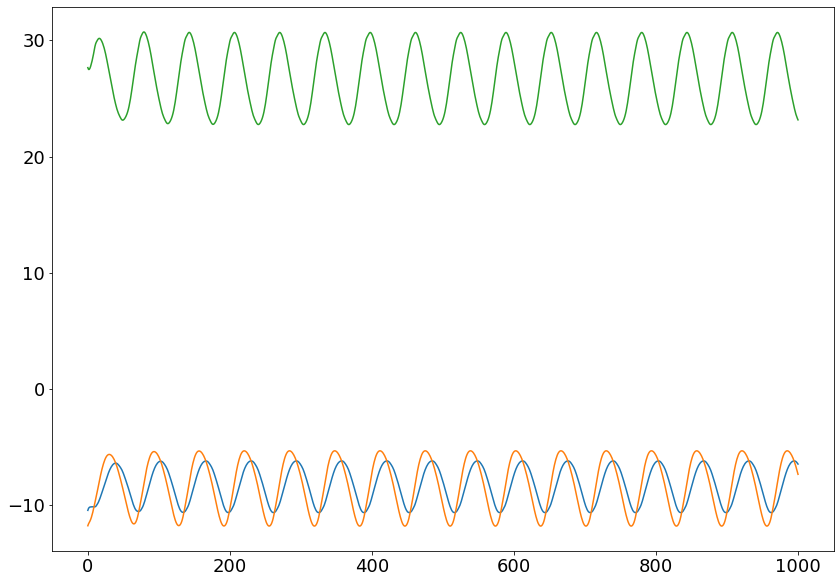

In [126]:
plt.plot(traj3D)


In [61]:
len(data)

1000

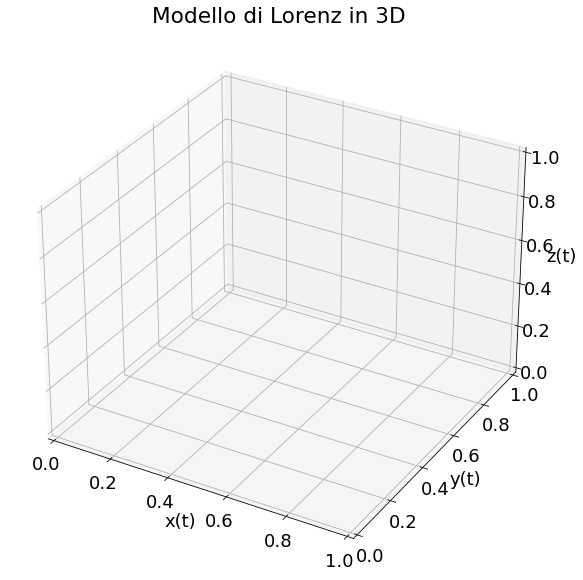

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.plot(traj3D[:,0],traj3D[:,1],traj3D[:,2],linestyle='--')
#ax.plot(data[:,0],data[:,1],data[:,2])
ax.set_xlabel('x(t)')
ax.set_ylabel('y(t)')
ax.set_zlabel('z(t)')
ax.set_title('Modello di Lorenz in 3D')
plt.show()